# E1 Binary Classification  (Univariate) - Iris data

## 1. Setup

In [2]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 2. Fetch, Load and Visualize data

### 2.1 Load data from .CSV file

In [3]:
iris = pd.read_csv("C:\\Users\\Hp\\Desktop\\Nikhat\\datasets\\iris.csv")


### 2.2 Exploratory Data Analysis (EDA)

In [4]:
iris.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SL        150 non-null float64
SW        150 non-null float64
PL        150 non-null float64
PW        150 non-null float64
target    150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [5]:
iris.describe()

,SL,SW,PL,PW,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
corr_matrix = iris.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
PW        0.956464
PL        0.949043
SL        0.782561
SW       -0.419446
Name: target, dtype: float64

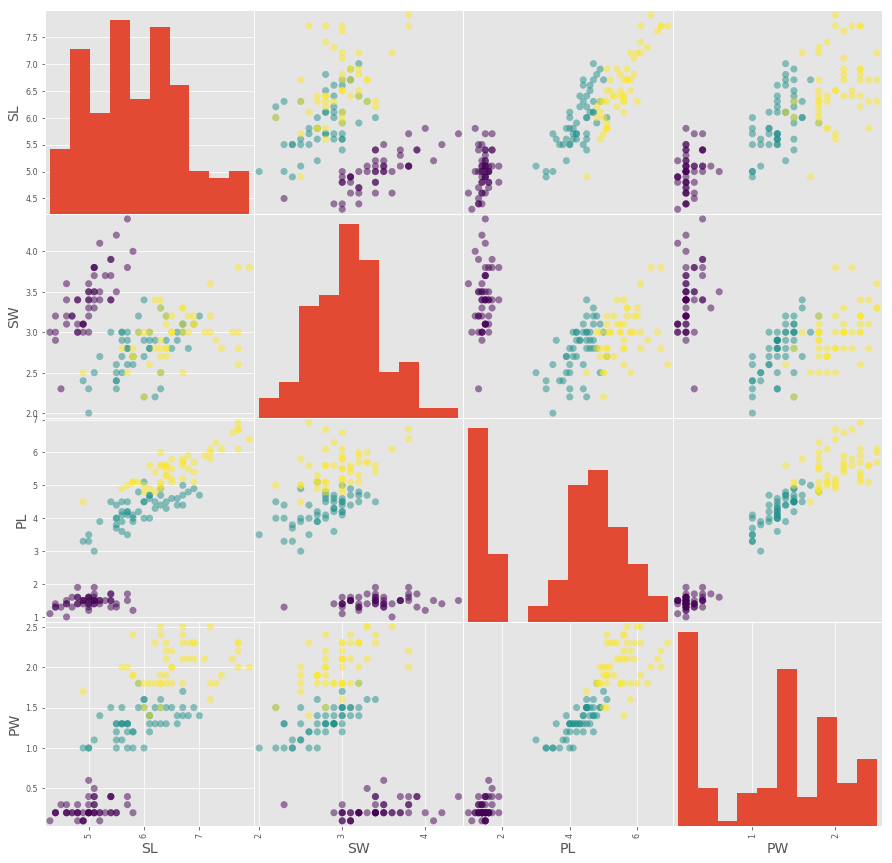

In [7]:
from pandas.plotting import scatter_matrix

data = iris.iloc[:, :4]
species = iris.iloc[:, 4]

scatter_matrix(data, c = species, figsize=[15, 15],
               s=50, marker='o');

###  2.3 Prepare dataset

In [9]:
X = iris.iloc[:, [3]].values # petal width
y = (iris.iloc[:, 4]== 2).astype(np.int)

## 3. Training Model : Logistic Regression 

### 3.1 Logistic Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

###  3.2 Visualize Decision Boundary (Univariate)

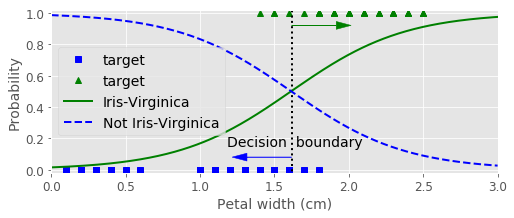

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]


plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

###  3.3 Predicition with model

In [33]:
decision_boundary

array([1.61561562])

In [34]:
log_reg.predict([[1.0]]) # if we take value above the decision_boundary i.e., 1.61 then the array gives 1 i.e., true

array([0])

In [35]:
log_reg.predict_proba([[1.5]])

array([[0.5732246, 0.4267754]])

### 4. Model Evalution

#### 4.1 Confusion Matrix

In [36]:
y_pred = log_reg.predict(X)

In [37]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[98,  2],
       [ 4, 46]], dtype=int64)

In [38]:
result = confusion_matrix(y, y_pred)

print("True Negative : " + str(result[0,0]))
print("False Negative: " + str(result[1,0]))
print("False Positive: " + str(result[0,1]))
print("True Positive : " + str(result[1,1]))

True Negative : 98
False Negative: 4
False Positive: 2
True Positive : 46


#### 4.2 Performance Measure  

In [39]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y, y_pred))
print("Pricision after CV:", precision_score(y, y_pred))
print("Recall after CV   :", recall_score(y, y_pred))
print("f1_score after CV :", f1_score(y, y_pred))

Accuracy after CV : 0.96
Pricision after CV: 0.9583333333333334
Recall after CV   : 0.92
f1_score after CV : 0.9387755102040817


#### 4.3  ROC Curve

In [40]:
from sklearn.metrics import roc_curve

y_scores = log_reg.predict_proba(X)[::,1]

fpr, tpr, thresholds = roc_curve(y, y_scores)

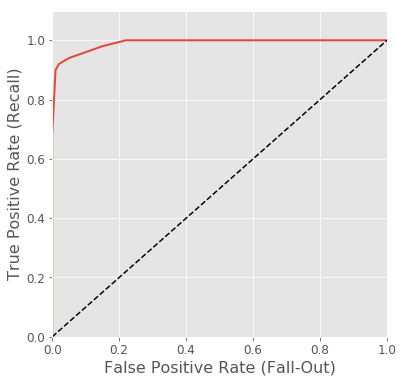

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([-0, 1, 0, 1.1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(6, 6))                         
plot_roc_curve(fpr, tpr)                         
plt.show()

#### 4.4  AUC Score

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_scores)

0.9902

#### 4.5  Classification Report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150

